In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from keras.datasets import cifar10
from PIL import Image

In [6]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 1040s 6us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

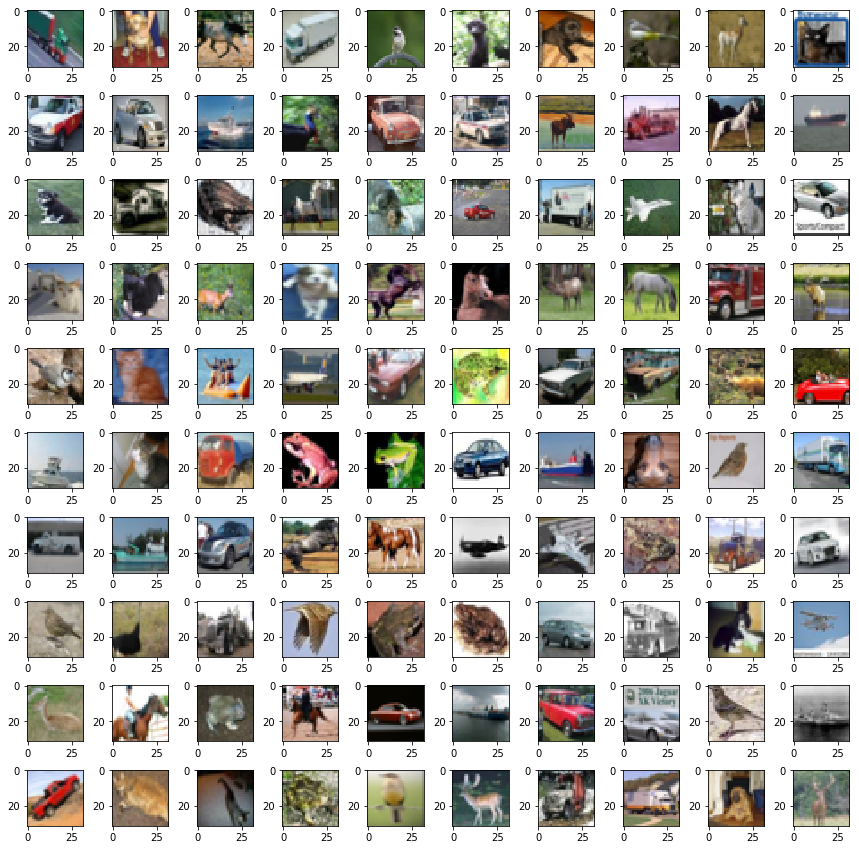

In [30]:
fig,axes=plt.subplots(10,10,figsize=(15,15))
axes=axes.ravel()
for i in range(0,10*10):
    img=X_train[50+i]
    axes[i].imshow(img)
    #axes[i].set_title(y_train[i])
plt.subplots_adjust(hspace=0.5)

In [31]:
## Preprocessing
seed=6
np.random.seed(seed)

In [32]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [33]:
X_train=X_train/225.0
X_test=X_test/225.0

In [36]:
from keras.utils.np_utils import to_categorical

In [38]:
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [39]:
Y_train.shape

(50000, 10)

In [40]:
out=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


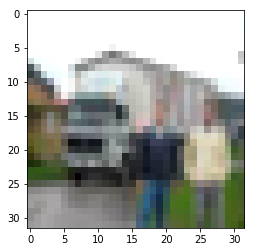

In [56]:
plt.imshow(X_train[16])

In [57]:
Y_train[16]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [58]:
out[y_train[16][0]]

'truck'

## Bulding Convolutional Network

In [60]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,GlobalAveragePooling2D,Dropout
from keras.optimizers import SGD

In [63]:
def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model


In [67]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 350
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1, batch_size=batch_size, verbose = 1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 192)      

In [69]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# define weights and build model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_44 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 16, 16, 192)      

In [80]:
y_pred_class=model.predict_classes(X_test[100:116])

In [81]:
y_pred_class.shape

(16,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

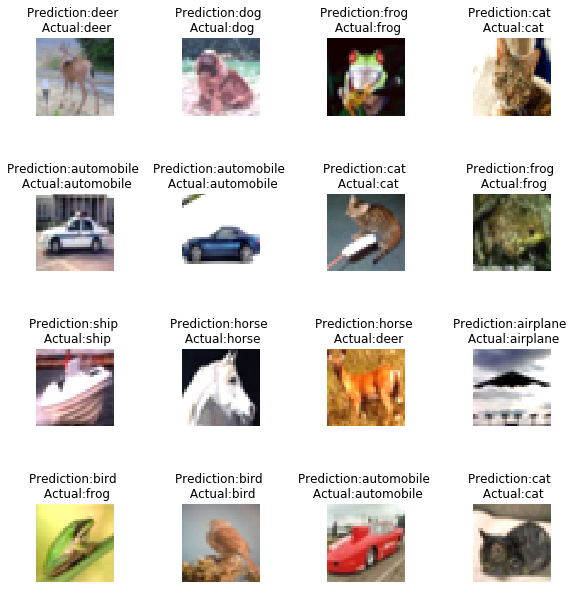

In [91]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
axes=axes.ravel()

for i in range(0,4*4):
    axes[i].imshow(X_test[100+i])
    axes[i].set_title("Prediction:{} \n Actual:{}".format(out[y_pred_class[i]],out[y_test[100+i][0]]))
    axes[i].axis('off')
fig.subplots_adjust(hspace = 1)